# Prueba - Fundamentos Data Science | Desafío 2: Rendimiento escolar
### Cristian Vidal Muñoz

# Prueba - Hito 1

### Objetivo
Completar el punto de __Preliminares__, así como __Aspectos computacionales__.

__Elementos a considerar__
* Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema. __(3 puntos)__
* Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. __(1 punto)__
* Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. __(1punto)__

__INTRODUCCIÓN PROBLEMA:__

Con el objetivo de identificar a los alumnos que presentan un bajo desempeño académico en una escuela Portuguesa, debemos desarrollar un modelo predictivo sobre el promedio final de un alumno en base a una serie de atributos sociodemográficos, conductuales y aspectos ambientales.

__TIPO DE PROYECTO__

Este caso vamos a implementar un predictor de __regresión lineal múltiple__, donde tenemos que predecir un valor numérico continuo, queremos predecir el promedio final de un alumno, para este algoritmo necesitamos 
obtener la relación entre variables independientes (X) y una variable dependiente (Y). El algoritmo de machine learning que utilizaremos sera __LinearRegression__. Para determinar cuáles van a ser los principales atributos a incluir en el modelo lo haremos mediante la generación de correlaciones parciales entre cada atributo y el vector objetivo.

__MÉTRICAS__

Algunas de las métricas que utilizaremos para evaluar el desempeño y precisión de nuestro modelo serán: Promedio del Error Cuadrático __(Mean Squared Error)__ y el estadístico __R-cuadrado__.

__LIBRERÍAS Y MÓDULOS__

Desarrollaremos este caso utilizando la __Suite__ de __Anaconda python__. Para la manipulación, operaciones y preparación de los datos usaremos __Pandas__ y __NumPy__. Para la visualización de los datos utilizaremos __missingno (matrix)__, __matplotlib (plt)__ y __Seaborn (sns)__. Nuestro análisis estadístico y econométrico lo haremos con __Statsmodels (ols)__. Los algoritmos de Machine Learning, validación y metricas de desempeño utilizaremos __Scikit-learn (LinearRegression, train_test_split, mean_squared_error, r2_score)__.

__ASPECTOS COMPUTACIONALES__
* python: 3.7.3
* python-bits: 64
* jupyter notebook 5.7.8
* conda 4.8.3
* pandas: 0.24.2
* pip: 19.0.3
* numpy: 1.16.2
* scipy: 1.2.1
* matplotlib: 3.0.3
* seaborn 0.9.0
* statsmodels 0.9.0
* sklearn 0.20.3

# Prueba - Hito 2

### Objetivo

Completar el punto de __Descripción__.

sección llamada __Descripción__ donde se generará un análisis descriptivo considerando el
tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección
debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre
las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento
(datos perdidos, recodificaciones).

### Elementos a considerar
* La inspección visual del vector objetivo. (2 puntos)
* La inspección visual de las variables. (2 puntos)
* La inspección de datos perdidos en las variables. (1 punto)

De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

#Importamos funciones auxiliares
import helpers as funcion_auxiliar

#Configuración de graficos
plt.style.use('ggplot')

#Ignorar Avisos
import warnings
warnings.filterwarnings("ignore")

## Aspectos adicionales a considerar

* La base de datos presenta una serie de anomalías. En la escuela no tienen buenas prácticas sobre cómo ingresar datos, por lo que existen datos perdidos que están registrados bajo tres categorías: nulidade, sem validade, zero. De manera adicional, hay 3 variables numéricas que se registraron como strings, cuya interpretación en pandas devuelve una estructura de datos genérica. Finalmente, la base está con un encoding distinto al normal y los delimitadores son distintos.

In [2]:
df = pd.read_csv('students.csv', sep='|', encoding='iso-8859-1').drop(columns = 'Unnamed: 0', axis = 1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


* Corregir datos Perdidos nulidade, sem validade, zero

In [3]:
df.replace({'nulidade': np.nan, 'sem validade': np.nan, 'zero': np.nan}, inplace=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        390 non-null object
sex           392 non-null object
age           391 non-null object
address       393 non-null object
famsize       391 non-null object
Pstatus       389 non-null object
Medu          392 non-null object
Fedu          390 non-null object
Mjob          389 non-null object
Fjob          395 non-null object
reason        391 non-null object
guardian      391 non-null object
traveltime    392 non-null object
studytime     390 non-null object
failures      390 non-null object
schoolsup     387 non-null object
famsup        390 non-null object
paid          394 non-null object
activities    390 non-null object
nursery       389 non-null object
higher        389 non-null object
internet      392 non-null object
romantic      393 non-null object
famrel        390 non-null object
freetime      393 non-null object
goout         390 non-null object
Dalc       

## Inspección de datos perdidos en las variables

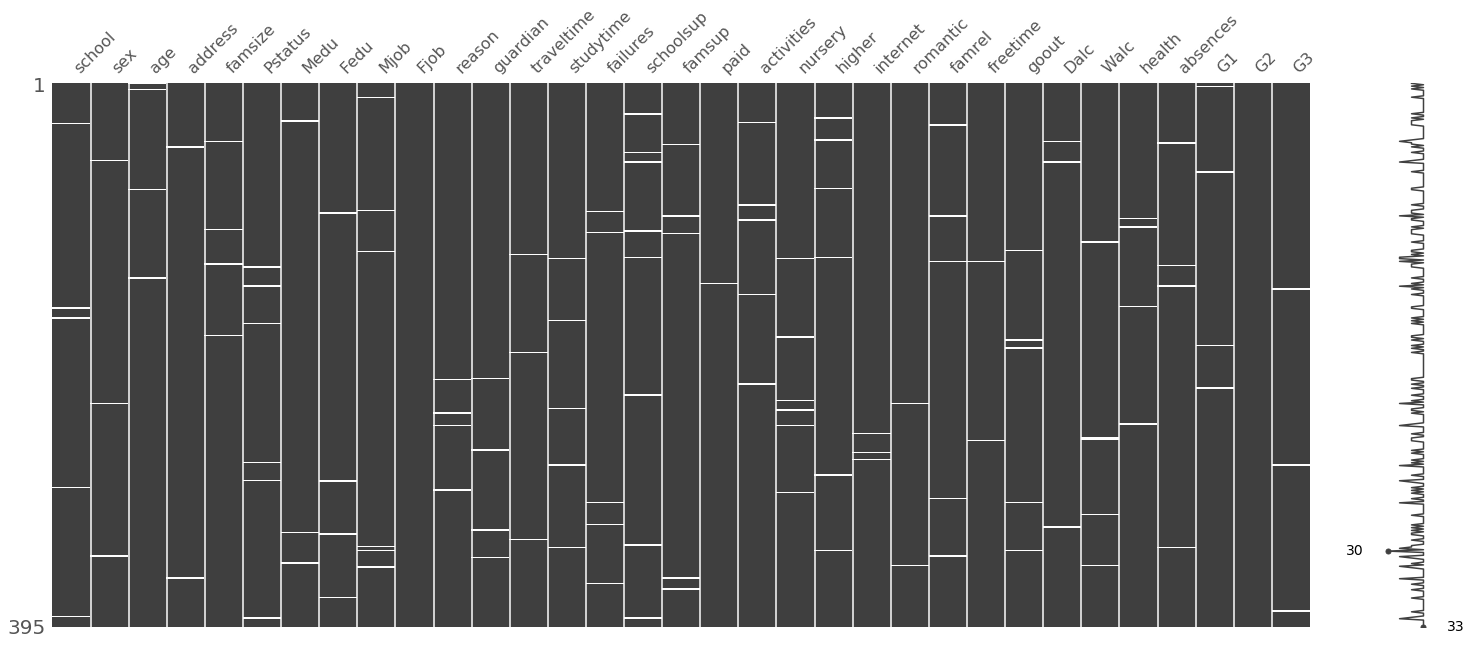

In [6]:
missingno.matrix(df)

In [7]:
df.isnull().sum()

school        5
sex           3
age           4
address       2
famsize       4
Pstatus       6
Medu          3
Fedu          5
Mjob          6
Fjob          0
reason        4
guardian      4
traveltime    3
studytime     5
failures      5
schoolsup     8
famsup        5
paid          1
activities    5
nursery       6
higher        6
internet      3
romantic      2
famrel        5
freetime      2
goout         5
Dalc          3
Walc          5
health        4
absences      4
G1            4
G2            0
G3            3
dtype: int64

In [8]:
round(df.isnull().sum()/df.shape[0]*100, 2)

school        1.27
sex           0.76
age           1.01
address       0.51
famsize       1.01
Pstatus       1.52
Medu          0.76
Fedu          1.27
Mjob          1.52
Fjob          0.00
reason        1.01
guardian      1.01
traveltime    0.76
studytime     1.27
failures      1.27
schoolsup     2.03
famsup        1.27
paid          0.25
activities    1.27
nursery       1.52
higher        1.52
internet      0.76
romantic      0.51
famrel        1.27
freetime      0.51
goout         1.27
Dalc          0.76
Walc          1.27
health        1.01
absences      1.01
G1            1.01
G2            0.00
G3            0.76
dtype: float64

__Se observa que a lo largo de todas las variables las tasas de datos perdidos son bajas, no superando el 2% del total de las observaciones.__

In [9]:
df_dropped = df.dropna()

In [10]:
print(f"El porcentaje de datos perdidos si eliminamos todos los N/A es de: {round(100-len(df_dropped)/len(df)*100, 2)}%")

El porcentaje de datos perdidos si eliminamos todos los N/A es de: 28.1%


In [11]:
print("DataFrame sin aplicar dropna")
print("Cantidad de registros:{}, Cantidad de columnas: {}".format(df.shape[0], df.shape[1]))

DataFrame sin aplicar dropna
Cantidad de registros:395, Cantidad de columnas: 33


In [12]:
print("DataFrame aplicando dropna")
print("Cantidad de registros:{}, Cantidad de columnas: {}".format(df_dropped.shape[0], df_dropped.shape[1]))

DataFrame aplicando dropna
Cantidad de registros:284, Cantidad de columnas: 33


####  Podemos observar que si aplicamos dropna a nuestra muestra original vamos a eliminar 111 registros (Vamos a continuar con nuestro análisis aplicando dropna a nuestra muestra original)

In [13]:
df_dropped.isna().sum()/df_dropped.shape[0]*100

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

## Proceso de preprocesamiento y recodificación de las variables

* Para simplficar el análisis y su posterior inclusión en un modelo predictivo, se sugiere recodificar las variables binarias como 0 y 1. Se recomienda seguir en criterio de asignarle 1 a aquellas categorías minoritarias.

* El procedimiento también debe aplicarse para aquelas variables nominales con más de 2 categorías siguiendo la misma lógica.

In [14]:
#Corregir variables (age, goout, health) numéricas que se registraron como strings
df_dropped['age'] = df_dropped['age'].astype(str).str.replace("\"", "")
df_dropped['age'] = df_dropped['age'].astype('float32')
df_dropped['goout'] = df_dropped['goout'].astype(str).str.replace("\"", "")
df_dropped['goout'] = df_dropped['goout'].astype('float32')
df_dropped['health'] = df_dropped['health'].astype(str).str.replace("\"", "")
df_dropped['health'] = df_dropped['health'].astype('float32')

# Recodificar variables con valores yes / no
d = {'yes': 1, 'no': 0}
df_dropped['schoolsup'] = df_dropped['schoolsup'].map(d)
df_dropped['famsup'] = df_dropped['famsup'].map(d)
df_dropped['paid'] = df_dropped['paid'].map(d)
df_dropped['activities'] = df_dropped['activities'].map(d)
df_dropped['nursery'] = df_dropped['nursery'].map(d)
df_dropped['higher'] = df_dropped['higher'].map(d)
df_dropped['internet'] = df_dropped['internet'].map(d)
df_dropped['romantic'] = df_dropped['romantic'].map(d)

# Cambiar tipo de datos
df_dropped['schoolsup'] = df_dropped['schoolsup'].astype('float32')
df_dropped['famsup'] = df_dropped['famsup'].astype('float32')
df_dropped['paid'] = df_dropped['paid'].astype('float32')
df_dropped['activities'] = df_dropped['activities'].astype('float32')
df_dropped['nursery'] = df_dropped['nursery'].astype('float32')
df_dropped['higher'] = df_dropped['higher'].astype('float32')
df_dropped['internet'] = df_dropped['internet'].astype('float32')
df_dropped['romantic'] = df_dropped['romantic'].astype('float32')
df_dropped['studytime'] = df_dropped['studytime'].astype('float32')
df_dropped['absences'] = df_dropped['absences'].astype('float32')
df_dropped['Walc'] = df_dropped['Walc'].astype('float32')
df_dropped['Dalc'] = df_dropped['Dalc'].astype('float32')
df_dropped['famrel'] = df_dropped['famrel'].astype('float32')
df_dropped['goout'] = df_dropped['goout'].astype('float32')
df_dropped['Medu'] = df_dropped['Medu'].astype('float32')
df_dropped['Fedu'] = df_dropped['Fedu'].astype('float32')
df_dropped['freetime'] = df_dropped['freetime'].astype('float32')

# Vectores objetivos para el modelo descriptivo
df_dropped['G1'] = df_dropped['G1'].astype('float32')
df_dropped['G2'] = df_dropped['G2'].astype('float32')
df_dropped['G3'] = df_dropped['G3'].astype('float32')

In [15]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 1 to 394
Data columns (total 33 columns):
school        284 non-null object
sex           284 non-null object
age           284 non-null float32
address       284 non-null object
famsize       284 non-null object
Pstatus       284 non-null object
Medu          284 non-null float32
Fedu          284 non-null float32
Mjob          284 non-null object
Fjob          284 non-null object
reason        284 non-null object
guardian      284 non-null object
traveltime    284 non-null object
studytime     284 non-null float32
failures      284 non-null object
schoolsup     284 non-null float32
famsup        284 non-null float32
paid          284 non-null float32
activities    284 non-null float32
nursery       284 non-null float32
higher        284 non-null float32
internet      284 non-null float32
romantic      284 non-null float32
famrel        284 non-null float32
freetime      284 non-null float32
goout         284 non-null floa

In [16]:
df_dropped.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
374,MS,F,18.0,R,LE3,T,4.0,4.0,other,other,...,5.0,4.0,4.0,1.0,1.0,1.0,0.0,19.0,18.0,19.0
357,MS,F,17.0,U,LE3,A,3.0,2.0,services,other,...,1.0,2.0,3.0,1.0,2.0,5.0,2.0,12.0,12.0,11.0
316,GP,F,18.0,U,GT3,T,2.0,1.0,services,other,...,5.0,3.0,3.0,1.0,2.0,1.0,0.0,8.0,8.0,0.0
263,GP,F,17.0,U,GT3,T,3.0,3.0,other,other,...,3.0,2.0,3.0,1.0,1.0,4.0,4.0,10.0,9.0,9.0
356,MS,F,17.0,R,GT3,T,4.0,4.0,teacher,services,...,4.0,3.0,3.0,1.0,2.0,5.0,4.0,12.0,13.0,13.0


## Inspección visual de las variables

In [17]:
for i in df.columns:
    if len(df_dropped[i].value_counts()) < 10 or df_dropped[i].dtypes == 'object':
        print('-------------------------------------------')
        print('#### {} ####'.format(i))
        print(round(df_dropped[i].value_counts('%'),2))
        print()
    else:
        print('-------------------------------------------')
        print('#### {} ####'.format(i))
        print(round(df_dropped[i].describe()))
        print()

-------------------------------------------
#### school ####
GP    0.87
MS    0.13
Name: school, dtype: float64

-------------------------------------------
#### sex ####
F    0.52
M    0.48
Name: sex, dtype: float64

-------------------------------------------
#### age ####
16.0    0.26
18.0    0.25
15.0    0.21
17.0    0.21
19.0    0.05
20.0    0.01
21.0    0.00
Name: age, dtype: float64

-------------------------------------------
#### address ####
U    0.75
R    0.25
Name: address, dtype: float64

-------------------------------------------
#### famsize ####
GT3    0.74
LE3    0.26
Name: famsize, dtype: float64

-------------------------------------------
#### Pstatus ####
T    0.9
A    0.1
Name: Pstatus, dtype: float64

-------------------------------------------
#### Medu ####
4.0    0.35
2.0    0.25
3.0    0.25
1.0    0.15
0.0    0.00
Name: Medu, dtype: float64

-------------------------------------------
#### Fedu ####
2.0    0.27
3.0    0.27
4.0    0.24
1.0    0.22
0.0    0.00

In [18]:
df_dropped.describe()

,age,Medu,Fedu,studytime,schoolsup,famsup,paid,activities,nursery,higher,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.00000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,16.707747,2.774648,2.521127,2.049296,0.133803,0.612676,0.443662,0.521127,0.785211,0.947183,...,3.940141,3.18662,3.084507,1.482394,2.239437,3.626760,5.588028,10.933099,10.640845,10.394366
std,1.284239,1.095408,1.091039,0.843411,0.341040,0.487999,0.497693,0.500436,0.411401,0.224062,...,0.881660,1.02117,1.076528,0.879513,1.285579,1.319112,8.156332,3.289196,3.789221,4.565904
min,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,4.000000,3.00000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,4.000000,3.00000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,10.500000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.00000,4.000000,2.000000,3.000000,5.000000,7.000000,13.000000,13.000000,13.000000
max,21.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


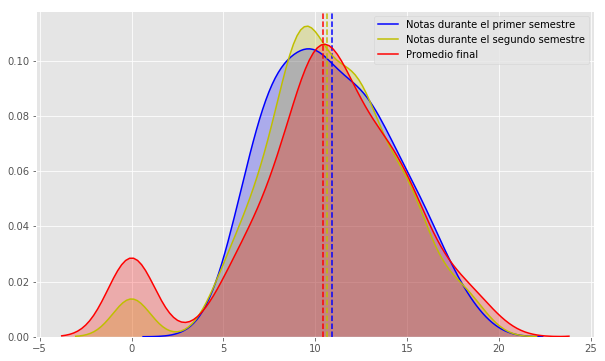

In [19]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_dropped['G1'], color="b", shade=True, label="Notas durante el primer semestre")
plt.axvline(round(np.mean(df_dropped['G1']), 3), color='b', linestyle='--')
sns.kdeplot(df_dropped['G2'], color="y", shade=True, label="Notas durante el segundo semestre")
plt.axvline(round(np.mean(df_dropped['G2']), 3), color='y', linestyle='--')
sns.kdeplot(df_dropped['G3'], color="r", shade=True, label="Promedio final")
plt.axvline(round(np.mean(df_dropped['G3']), 3), color='r', linestyle='--')
plt.legend()

__Observaciones:__

__G1__: Notas durante el primer semestre (numérica: de 0 a 20)
* La media de las notas durante el primer semestre es 10.9, la nota mínima es 3.2 y la nota máxima es 19.

__G2__: Notas durante el segundo semestre (numérica: de 0 a 20).
* La media de las notas durante el segundo semestre es 10.6, la nota mínima es 3.7 y la nota máxima es 19.

__G3__: Promedio final (numérica: de 0 a 20).
* El promedio de la nota final de los estudiantes es 10.3, la nota mínima es 4.5 y la nota máxima es 20.

__Podemos observar que las notas de los estudiantes en el segundo semestre mejoraron en comparación con el primer semestre. El promedio final de los estudiantes tiene una distribución similar a las notas durante el segundo semestre pero con un rango menor.__

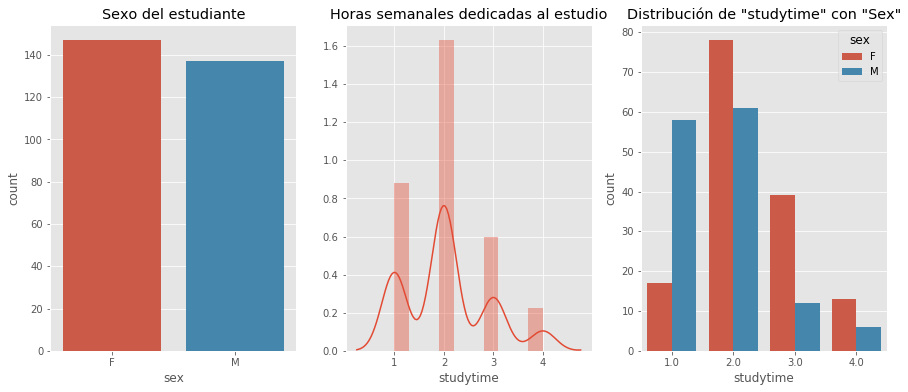

In [20]:
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
sns.countplot(df_dropped['sex'], ax=ax1).set_title('Sexo del estudiante')
sns.distplot(df_dropped['studytime'], ax=ax2).set_title('Horas semanales dedicadas al estudio')
sns.countplot(x="studytime", hue="sex", data=df_dropped)
plt.title('Distribución de "studytime" con "Sex"')
plt.show()

__Observaciones:__

__sex:__ Sexo del estudiante.
* El 52% de los estudiantes son mujeres y un 48% son hombres (Presenta 2 clases).

__studytime:__ Horas semanales dedicadas al estudio (numérica: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas).
* Las tendencias mas altas para la variable "studytime" son las categorías  "2 a 5 horas (2)" con un 49% y "<2 horas (1)" con un 26% (Presenta 4 clases).

__Podemos observar que las mujeres estudian mas horas en la semana que los hombres.__

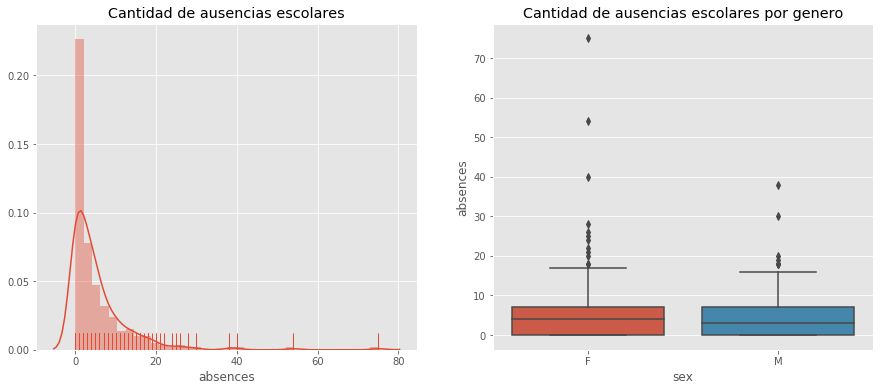

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 6))
sns.distplot(df_dropped['absences'], ax=ax1, hist=True, rug=True).set_title('Cantidad de ausencias escolares')
sns.boxplot(x=df_dropped['sex'], y=df_dropped['absences']).set_title('Cantidad de ausencias escolares por genero')
plt.show()

__Observaciones__

__absences__: Cantidad de ausencias escolares (numérica: de 0 a 93)
* El promedio de ausencias de los estudiantes es de 5.6, la media es de 4.4 y el valor máximo es 75

__Podemos observar que no existe una gran diferencia entre la cantidad de ausencias entre los hombres y las mujeres (Tienen similar distribución), pero para ambas clases (Hombres y Mujeres) existen casos outliers__

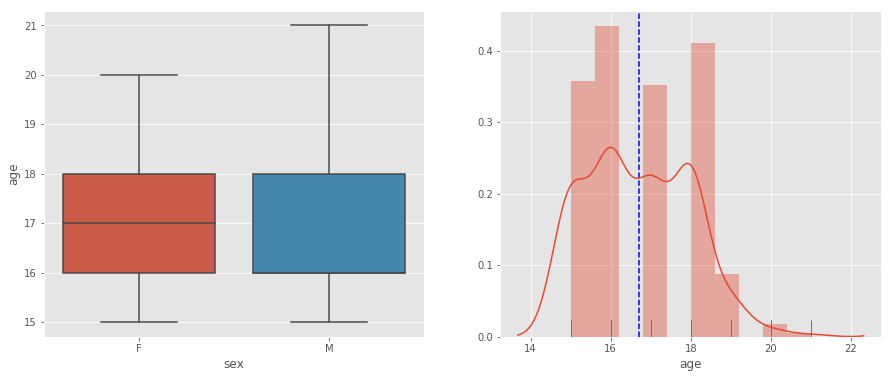

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 6))
sns.boxplot(x=df_dropped['sex'], ax=ax1, y=df_dropped['age'])
plt.axvline(round(np.mean(df_dropped['age']), 3), color='b', linestyle='--')
sns.distplot(df_dropped['age'], ax=ax2, hist=True, rug=True)
plt.show()

__age:__ Edad del estudiante.
* Los estudiantes tienen en promedio 16 años, la edad mínima es 15 y la edad máxima es 21. 

__Podemos observar que existen 4 tendencias para la variable edad, notamos que la distribución de la edades para las mujeres es un poco menor.__

<Figure size 720x432 with 0 Axes>

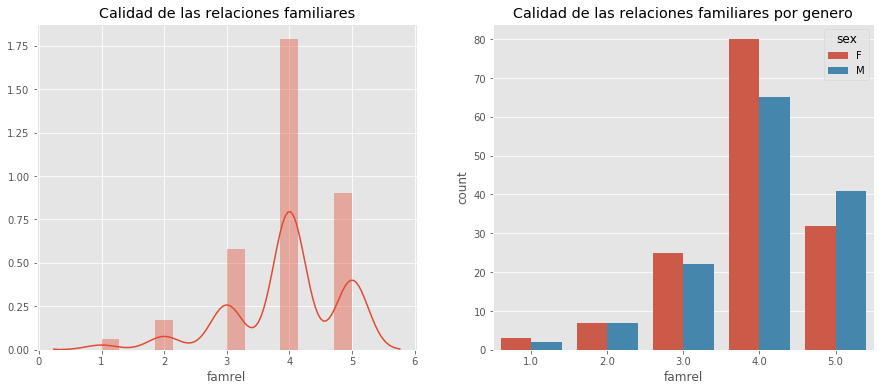

In [23]:
plt.figure(figsize=(10,6))
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 6))
sns.distplot(df_dropped['famrel'], ax=ax1).set_title('Calidad de las relaciones familiares')
sns.countplot(x="famrel", hue="sex", data=df_dropped)
plt.title('Calidad de las relaciones familiares por genero')
plt.show()

__Observaciones:__

__famrel__: Calidad de las relaciones familiares (numérica: de 1 - muy malas a 5 - excelentes).
* Las tendencias mas altas para la variable "famrel" son las categorías "(4) muy buena" con un 51% y "excelente (5)" con un 26% (Presenta 5 clases).

__Podemos observar que la mayoría de los estudiantes tiene una buena relación con la familia.__

<Figure size 720x432 with 0 Axes>

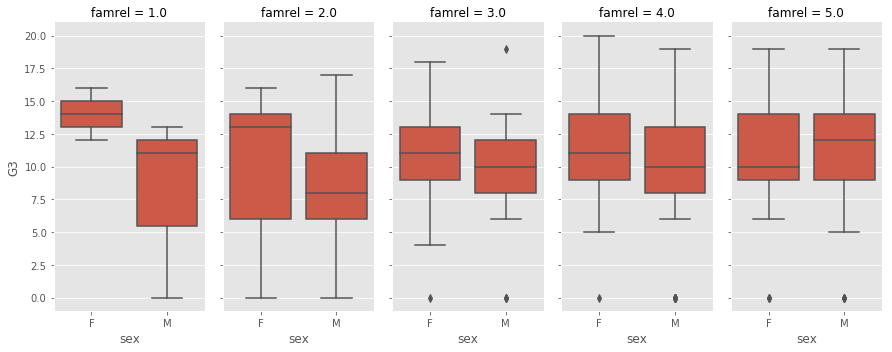

In [24]:
plt.figure(figsize=(10,6))
g = sns.FacetGrid(df_dropped, col='famrel', size=5, aspect=.5)
g = g.map(sns.boxplot, 'sex', 'G3')

__Observaciones:__


__Podemos observar que los estudiantes que tienen malas relaciones familiares tienen notas mas bajas en comparación con los estudiantes que tiene excelentes relaciones familiares__

<Figure size 720x432 with 0 Axes>

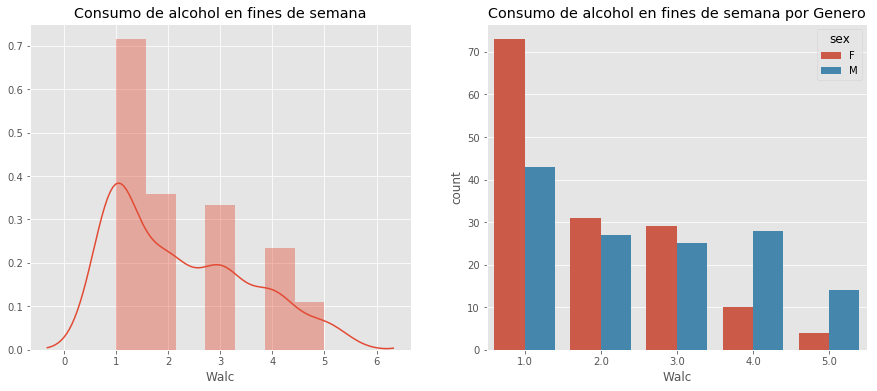

In [25]:
plt.figure(figsize=(10,6))
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 6))
sns.distplot(df_dropped['Walc'], ax=ax1).set_title('Consumo de alcohol en fines de semana')
sns.countplot(x="Walc", hue="sex", data=df_dropped)
plt.title('Consumo de alcohol en fines de semana por Genero')
plt.show()

__Observaciones:__

__Walc__: Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto)
* Las tendencias mas altas para la variable "Walc" son las categorías "1 (muy bajo)" con un 41% y "2 (bajo/poco)" con un 20% (Presenta 5 clases)

__Podemos observar que los estudiantes consumen poco alcohol los fines de semana__

<Figure size 720x432 with 0 Axes>

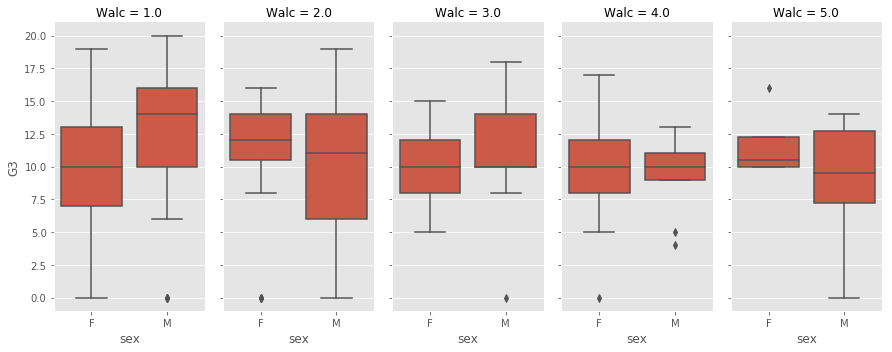

In [26]:
plt.figure(figsize=(10,6))
g = sns.FacetGrid(df_dropped, col='Walc', size=5, aspect=.5)
g = g.map(sns.boxplot, 'sex', 'G3')
plt.show()

__Podemos observar que los estudiantes que beben más los fines de semana tienen un peor rendimiento académico, pero para la categoría Walc = 5 notamos que existen un grupo de mujeres con notas (G3) "buenas" (casos outliers), también vemos que para la categoría Walc=1 los hombres tienen mejores notas (G3) que las mujeres y para la categoría Walc = 3 las mujeres tienen mejores notas (G3) que los hombres__

### Otras Interpretaciones:

__school:__ Escuela del estudiante.
* La mayoría de los estudiantes pertenecen a la escuela Gabriel Pereira (87%).

__address:__ Ubicación de la casa del estudiante.
* La mayoría de los estudiantes viven en sectores urbanos(75%) en comparación con los estudiantes que viven en sectores rurales (25%).

__famsize:__ Tamaño de la familia.
* El 74% de los estudiantes son de familias de máximo 3 personas, el 26% de los estudiantes son de familias mayores a 3 personas.

__Pstatus:__ Estado cohabitacional de los padres.
* La mayoría de los estudiantes viven con sus padres (90%), solo el 10% de los estudiantes viven separados de sus padres.

__Medu:__ Nivel educacional de la madre.
* Las tendencias mas altas para el nivel educacional de la madre son "educación superior" con un 35% y "de 5to a 9" con un 25%.

__Fedu:__ Nivel educacional del padre.
* Las tendencias mas altas para el nivel educacional del padre son las categorías "educación media" con un 27% y "de 5to a 9, 3" con un 27%.

__Mjob:__ Ocupación de la madre.
* Las tendencias mas altas para la ocupación de la madre son las categorías "services" con un 24% y "teacher" con un 15%.

__Fjob:__ Ocupación del padre
* Las tendencias mas altas para la ocupación del padre son las categorías "other" con un 56% y "services" con un 28%.

__reason:__ Razón para escoger la escuela.
* Las tendencias mas altas para saber porque razón el estudiante escogió la escuela son las categorías "preferencia de cursos" con un 36% y "cercano a casa" con un 27%.

__guardian:__ Apoderado del estudiante.
* El 70% de los estudiantes su apoderado es su madre, seguido por su padre con un 21%.

__traveltime:__ Tiempo de viaje entre hogar y colegio.
* Las tendencias mas altas para "tiempo de viaje entre hogar y colegio" son las categorías "- <15 min" con un 62% y "15 a 30 min." con un 30%.

__failures:__ Número de clases reprobadas.
* La mayoría de los estudiantes no ha reprobado clases (79%).

__schoolsup:__ Apoyo educacional del colegio.
* La mayoría de los estudiantes tiene apoyo educacional del colegio (87%).

__famsup:__ Apoyo educacional familiar.
* El 61% de los estudiantes tienen apoyo educacional familiar en comparación con el 39% de los estudiantes que no tienen apoyo educacional familiar.

__paid:__ Clases particulares pagadas (matemáticas o portugués)
* El 56% de los estudiantes tienen clases particulares pagadas, el 44% de los estudiantes que no tienen clases particulares pagadas.

__activities:__ Actividades extracurriculares.
* El 52% de los estudiantes tienen actividades extracurriculares, el 48% de los estudiantes no tienen actividades extracurriculares.

__nursery:__ Asistió a guardería infantil.
* La mayoría de los estudiantes asistió a guardería infantil (79%).

__higher:__ Desea proseguir estudios superiores.
* La mayoría de los estudiantes desean seguir con estudios superiores (95%).

__internet__: Acceso a Internet desde el hogar.
* La mayoría de los estudiantes tiene acceso a Internet en el hogar (81%).

__romantic__: Relación romántica.
* El 67% de los estudiantes tiene una relación romántica, el 33% de los estudiantes no tienen una relación romántica.

__freetime__: Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho)
* Las tendencias mas altas para "tiempo libre fuera del colegio" son las categorías "3 (regular)" con un 40% y "4 (moderado)" con un 27%.

__goout__: Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas)
* Las tendencias mas altas para "salidas con amigos" son las categorías "3 (regular)" con un 36% y "2 (pocas)" con un 27%.

__Dalc__: Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto)
* La mayoria de los estudiantes consume muy poco alcohol en días de la semana (70%).


__health__: Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno)
* Las tendencias mas altas para "estado de salud actual" son las categorías "5 (muy bueno)" con un 37% y "3 (regular)" con un 26%.

# Prueba - Hito 3

### Objetivo
Completar el punto de __Modelación descriptiva__.

__Elementos a considerar__
* La modelación mediante regresión de ambos problemas. (2 puntos)
* La interpretación de los principales regresores en cada problema. (2 puntos)
* La definición de las estrategias de Modelación predictiva. (1 punto)

# Modelacion descriptiva

In [27]:
df_dummies = pd.get_dummies(df_dropped, drop_first=True)
df_dummies.sample(5)

,age,Medu,Fedu,studytime,schoolsup,famsup,paid,activities,nursery,higher,...,reason_other,reason_reputation,guardian_mother,guardian_other,traveltime_2,traveltime_3,traveltime_4,failures_1,failures_2,failures_3
196,17.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
332,18.0,3.0,3.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
51,15.0,4.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1,0,1,0,0,0,0,0,0,0
54,15.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1,0,1,0,0,0,0,0,0,0
95,15.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,1,0,0,1,0,0


In [28]:
new_corr = df_dummies.corr()
round(new_corr['G3'].sort_values(ascending=False), 2)

G3                   1.00
G2                   0.90
G1                   0.80
Medu                 0.18
higher               0.16
address_U            0.12
Fedu                 0.11
reason_reputation    0.11
sex_M                0.10
Mjob_health          0.10
paid                 0.09
reason_other         0.09
internet             0.08
Fjob_teacher         0.08
famsize_LE3          0.07
famrel               0.07
studytime            0.07
nursery              0.05
Mjob_services        0.05
freetime             0.04
guardian_mother      0.03
Mjob_teacher         0.03
Fjob_health          0.03
traveltime_3         0.02
absences             0.01
Fjob_services        0.01
school_MS            0.01
reason_home         -0.01
Walc                -0.03
Mjob_other          -0.04
activities          -0.04
Dalc                -0.05
famsup              -0.06
Pstatus_T           -0.06
Fjob_other          -0.07
traveltime_2        -0.08
traveltime_4        -0.09
schoolsup           -0.09
failures_1  

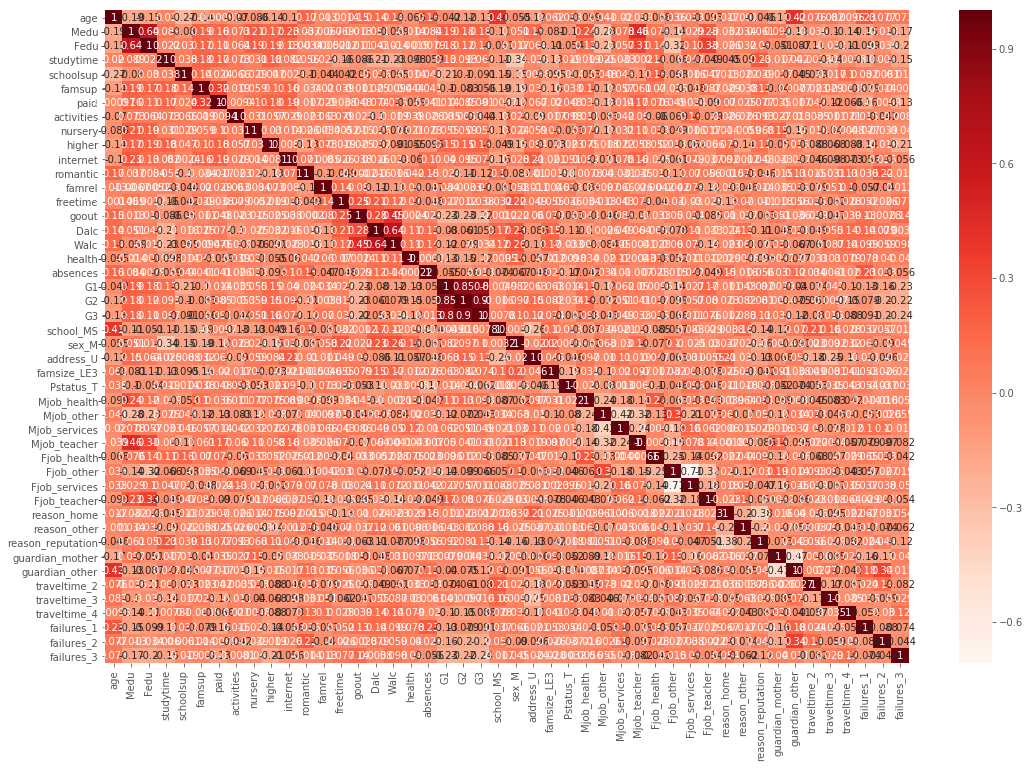

In [29]:
corr = df_dummies.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, cmap='Reds',annot=True)

* Hay una correlación muy alta entre la variable "Promedio final"(G3) y "Notas durante el primer semestre"(G1) (0.80)
* Hay una correlación muy alta entre la variable "Promedio final"(G3) y "Notas durante el segundo semestre"(G2) (0.90)

__A simple vista podemos observar que existe una fuerte correlación entre nuestros vectores objetivos (G1, G2 y G3).__

__Nuestro vector objetivo G3 tiene correlaciones muy baja con las siguientes variables:__
    * "Promedio final"(G3) y "Salidas con amigos"(goout) (-0.22)
    * "Promedio final"(G3) y "Edad del estudiante"(age) (-0.13)
    * "Promedio final"(G3) y "Estado de salud actual"(health) (-0.12)
    * "Promedio final"(G3) y "Relación romántica"(romantic) (-0.12)
    * "Promedio final"(G3) y "Nivel educacional de la madre"(Medu) (0.18)
    * "Promedio final"(G3) y "Desea proseguir estudios superiores"(higher) (0.16)
    * "Promedio final"(G3) y "Nivel educacional del padre"(Fedu) (0.11)

Text(0.5, 0, 'G2')

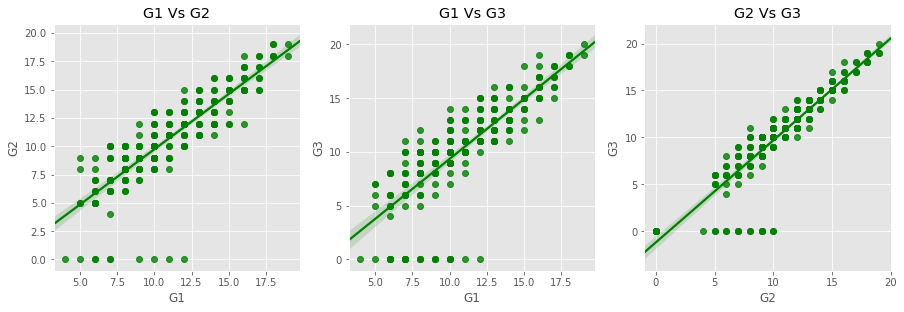

In [30]:
plt.figure(figsize=(15, 10))
plt.subplot((3/3)+1, 3, 1)
sns.regplot(y=df_dummies['G2'] , x=df_dummies['G1'], color="green")
plt.title('G1 Vs G2')
plt.xlabel("G1")
plt.subplot((3/3)+1, 3, 2)
sns.regplot(y=df_dummies['G3'] , x=df_dummies['G1'], color="green")
plt.title('G1 Vs G3')
plt.xlabel("G1")
plt.subplot((3/3)+1, 3, 3)
sns.regplot(y=df_dummies['G3'] , x=df_dummies['G2'], color="green")
plt.title("G2 Vs G3")
plt.xlabel("G2")

__A simple vista, podemos observar que los gráficos nos enseñan que en la medida que nuestros regresores G1 y G2 van aumentando en la escala, el "Promedio Final" aumenta (asociación positiva entre variables)__

Text(0.5, 0, '')

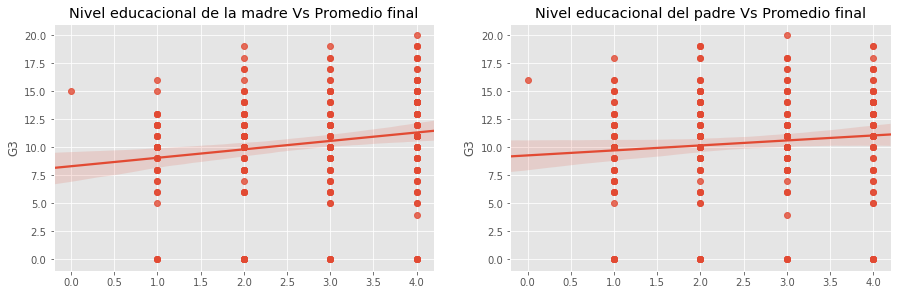

In [31]:
plt.figure(figsize=(15, 10))
plt.subplot((2/2)+1, 2, 1)
sns.regplot(y=df_dummies['G3'] , x=df_dummies['Medu'])
plt.title('Nivel educacional de la madre Vs Promedio final')
plt.xlabel("")
plt.subplot((2/2)+1, 2, 2)
sns.regplot(y=df_dummies['G3'] , x=df_dummies['Fedu'])
plt.title('Nivel educacional del padre Vs Promedio final')
plt.xlabel("")
plt.xlabel("")

* __Podemos observar que la nota final (G3) aumenta a medida que el nivel educacional de la madre aumenta__
* __Podemos observar que la nota final (G3) aumenta a medida que el nivel educacional del padre aumenta__

Text(0.5, 0, '')

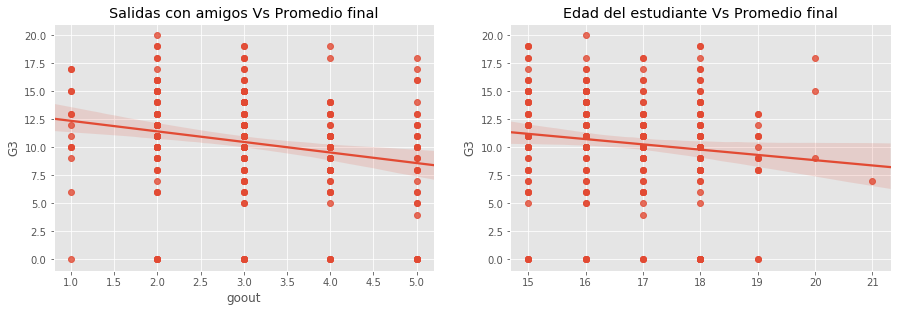

In [32]:
plt.figure(figsize=(15, 10))
plt.subplot((2/2)+1, 2, 1)
sns.regplot(y=df_dummies['G3'] , x=df_dummies['goout'])
plt.title('Salidas con amigos Vs Promedio final')

plt.subplot((2/2)+1, 2, 2)
sns.regplot(y=df_dummies['G3'] , x=df_dummies['age'])
plt.title('Edad del estudiante Vs Promedio final')
plt.xlabel("")

* __Podemos observar que la nota final (G3) desciende a medida que los estudiantes salen mas con sus amigos__
* __Podemos observar que la nota final (G3) desciende a medida que los estudiantes tienen mas edad__

Text(0.5, 1.0, 'Consumo de alcohol en fines de semana Vs Promedio final')

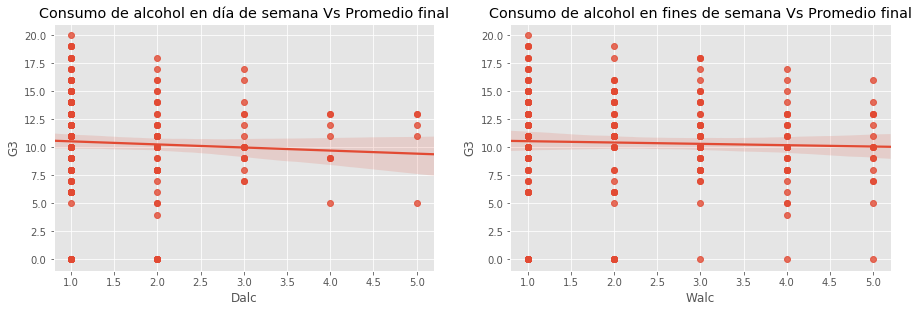

In [33]:
plt.figure(figsize=(15, 10))
plt.subplot((2/2)+1, 2, 1)
sns.regplot(y=df_dummies['G3'] , x=df_dummies['Dalc'])
plt.title('Consumo de alcohol en día de semana Vs Promedio final')

plt.subplot((2/2)+1, 2, 2)
sns.regplot(y=df_dummies['G3'] , x=df_dummies['Walc'])
plt.title('Consumo de alcohol en fines de semana Vs Promedio final')

* __Podemos observar que la nota final (G3) desciende en medida que el consumo de alcohol en fines de semanas es mas elevado__
* __Podemos observar que la nota final (G3) desciende en medida que el consumo de alcohol en día de semana es mas elevado__

# Prueba - Hito 3

## Modelación descriptiva

In [34]:
#Regresión clasica
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Modelación descriptiva para G1 (Modelo Saturado)

In [35]:
predictores = ' + '.join(df_dummies.drop(['G1', 'G2', 'G3'], axis=1).columns)
predictores

'age + Medu + Fedu + studytime + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + school_MS + sex_M + address_U + famsize_LE3 + Pstatus_T + Mjob_health + Mjob_other + Mjob_services + Mjob_teacher + Fjob_health + Fjob_other + Fjob_services + Fjob_teacher + reason_home + reason_other + reason_reputation + guardian_mother + guardian_other + traveltime_2 + traveltime_3 + traveltime_4 + failures_1 + failures_2 + failures_3'

In [36]:
model_G1 = smf.ols('G1 ~ ' + predictores, data=df_dummies).fit()
model_G1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     2.942
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           9.12e-08
Time:                        14:09:11   Log-Likelihood:                -680.49
No. Observations:                 284   AIC:                             1449.
Df Residuals:                     240   BIC:                             1610.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.8353      3.660      2.687      0.008       2.625      17.045
age                   0.0656      0.187      0.351      0.726      -0.303       0.434
Medu                  0.1666      0.284      0.586      0.559      -0.394       0.727
Fedu                  0.1188      0.236      0.503      0.616      -0.347       0.584
studytime             0.5795      0.247      2.346      0.020       0.093       1.066
schoolsup            -1.7238      0.568     -3.033      0.003      -2.843      -0.604
famsup               -1.0836      0.412     -2.630      0.009      -1.895      -0.272
paid                  0.1373      0.410      0.335      0.738      -0.670       0.944
activities           -0.4495      0.370     -1.215      0.225      -1.178       0.279
nursery              -0.0078      0.454     -0.017      0.986      -0.902       0.887
higher                1.0886      0.876      1.243      0.215      -0.637       2.814
internet              0.0524      0.502      0.104      0.917      -0.937       1.041
romantic              0.0288      0.411      0.070      0.944      -0.781       0.838
famrel                0.1346      0.216      0.623      0.534      -0.291       0.560
freetime              0.4114      0.194      2.123      0.035       0.030       0.793
goout                -0.7650      0.200     -3.829      0.000      -1.158      -0.371
Dalc                 -0.0325      0.291     -0.112      0.911      -0.605       0.540
Walc                  0.1371      0.212      0.645      0.519      -0.281       0.556
health               -0.2950      0.142     -2.084      0.038      -0.574      -0.016
absences             -0.0031      0.025     -0.124      0.902      -0.052       0.046
school_MS            -0.3566      0.670     -0.533      0.595      -1.676       0.962
sex_M                 0.7954      0.434      1.833      0.068      -0.060       1.650
address_U             0.0632      0.490      0.129      0.897      -0.901       1.027
famsize_LE3           0.3351      0.440      0.762      0.447      -0.531       1.202
Pstatus_T            -0.1690      0.657     -0.257      0.797      -1.462       1.124
Mjob_health           1.2190      0.924      1.319      0.189      -0.602       3.040
Mjob_other           -0.4064      0.603     -0.673      0.501      -1.595       0.782
Mjob_services         0.5530      0.678      0.816      0.415      -0.782       1.888
Mjob_teacher         -1.0277      0.837     -1.229      0.220      -2.676       0.620
Fjob_health          -0.8457      1.306     -0.648      0.518      -3.418       1.727
Fjob_other           -1.3380      0.987     -1.356      0.176      -3.281       0.605
Fjob_services        -0.6463      0.995     -0.650      0.516      -2.605       1.313
Fjob_teacher          1.1703      1.203      0.973      0.332      -1.200

__Si ejecutamos el modelo de forma 'G1 ~ age + Medu + Fedu + studytime + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + school_MS + sex_M + address_U + famsize_LE3 + Pstatus_T + Mjob_health + Mjob_other + Mjob_services + Mjob_teacher + Fjob_health + Fjob_other + Fjob_services + Fjob_teacher + reason_home + reason_other + reason_reputation + guardian_mother + guardian_other + traveltime_2 + traveltime_3 + traveltime_4 + failures_1 + failures_2 + failures_3', observamos que todas las variables juntas explica en un 34% la variabilidad de G1 (Notas durante el primer semestre).__

## Modelación descriptiva para G1 (predictores significativo)

In [37]:
model_G1_2 = smf.ols('G1 ~ studytime + schoolsup + famsup + freetime + goout + health + failures_1 + failures_2 + failures_3', data=df_dummies).fit()
model_G1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     8.617
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           2.24e-11
Time:                        14:09:11   Log-Likelihood:                -705.23
No. Observations:                 284   AIC:                             1430.
Df Residuals:                     274   BIC:                             1467.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9704      1.015     12.776      0.000      10.972      14.969
studytime      0.3846      0.218      1.761      0.079      -0.045       0.815
schoolsup     -1.9417      0.522     -3.723      0.000      -2.968      -0.915
famsup        -0.7006      0.371     -1.886      0.060      -1.432       0.031
freetime       0.3733      0.180      2.074      0.039       0.019       0.728
goout         -0.6488      0.171     -3.788      0.000      -0.986      -0.312
health        -0.2499      0.135     -1.855      0.065      -0.515       0.015
failures_1    -1.2226      0.536     -2.281      0.023      -2.278      -0.167
failures_2    -2.5862      0.815     -3.175      0.002      -4.190      -0.983
failures_3    -3.7330      0.978     -3.819      0.000      -5.657      -1.809
==============================================================================
Omnibus:                        6.370   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                4.765
Skew:                           0.198   Prob(JB):                       0.0923
Kurtosis:                       2.504   Cond. No.                         37.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Si ejecutamos el modelo de forma 'G1 ~ studytime + schoolsup + famsup + freetime + goout + health + failures_1 + failures_2 + failures_3', observamos que todas las variables juntas explica en un 22% la variabilidad de G1 (Notas durante el primer semestre). Podemos observar que los regresores con mayor nivel de precisión serian freetime, goout y health. Las variables que aportan mayor contribución son failures_3 y failures_2. La reducción de los predictores hizo que R-squared disminuyera.__

## Modelación descriptiva para G2 (Modelo Saturado)

In [38]:
model_G2 = smf.ols('G2 ~ ' + predictores, data=df_dummies).fit()
model_G2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     2.622
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           1.98e-06
Time:                        14:09:12   Log-Likelihood:                -726.13
No. Observations:                 284   AIC:                             1540.
Df Residuals:                     240   BIC:                             1701.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.2900      4.298      2.859      0.005       3.823      20.757
age                  -0.1255      0.220     -0.572      0.568      -0.558       0.307
Medu                  0.3568      0.334      1.068      0.286      -0.301       1.015
Fedu                 -0.1649      0.277     -0.594      0.553      -0.711       0.382
studytime             0.4936      0.290      1.702      0.090      -0.078       1.065
schoolsup            -1.0016      0.667     -1.501      0.135      -2.316       0.313
famsup               -1.0814      0.484     -2.235      0.026      -2.035      -0.128
paid                  0.6517      0.481      1.355      0.177      -0.296       1.599
activities           -0.2242      0.434     -0.516      0.606      -1.080       0.631
nursery               0.1633      0.533      0.306      0.760      -0.887       1.214
higher                1.1592      1.029      1.127      0.261      -0.867       3.186
internet              0.4832      0.590      0.820      0.413      -0.678       1.645
romantic             -0.5372      0.482     -1.113      0.267      -1.488       0.413
famrel                0.0547      0.254      0.215      0.830      -0.445       0.555
freetime              0.3618      0.228      1.590      0.113      -0.086       0.810
goout                -1.0056      0.235     -4.287      0.000      -1.468      -0.544
Dalc                 -0.1962      0.341     -0.575      0.566      -0.869       0.476
Walc                  0.3928      0.249      1.574      0.117      -0.099       0.884
health               -0.3989      0.166     -2.399      0.017      -0.726      -0.071
absences             -0.0162      0.029     -0.549      0.583      -0.074       0.042
school_MS             0.2550      0.786      0.324      0.746      -1.294       1.804
sex_M                 0.8388      0.510      1.646      0.101      -0.165       1.843
address_U             0.7675      0.575      1.335      0.183      -0.365       1.900
famsize_LE3           0.4782      0.517      0.926      0.356      -0.539       1.496
Pstatus_T            -0.6479      0.771     -0.840      0.402      -2.167       0.871
Mjob_health           1.4593      1.086      1.344      0.180      -0.679       3.598
Mjob_other            0.1490      0.709      0.210      0.834      -1.247       1.545
Mjob_services         0.6527      0.796      0.820      0.413      -0.915       2.221
Mjob_teacher         -0.9731      0.982     -0.991      0.323      -2.908       0.962
Fjob_health          -0.2124      1.533     -0.138      0.890      -3.233       2.808
Fjob_other           -0.5397      1.159     -0.466      0.642      -2.822       1.743
Fjob_services         0.4782      1.168      0.410      0.683      -1.822       2.779
Fjob_teacher          1.4245      1.413      1.008      0.314      -1.359

__Si ejecutamos el modelo de forma 'G2 ~ age + Medu + Fedu + studytime + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + school_MS + sex_M + address_U + famsize_LE3 + Pstatus_T + Mjob_health + Mjob_other + Mjob_services + Mjob_teacher + Fjob_health + Fjob_other + Fjob_services + Fjob_teacher + reason_home + reason_other + reason_reputation + guardian_mother + guardian_other + traveltime_2 + traveltime_3 + traveltime_4 + failures_1 + failures_2 + failures_3', observamos que todas las variables juntas explica en un 32% la variabilidad de G2 (Notas durante el segundo semestre).__

## Modelación descriptiva para G2 (predictores significativo)

In [39]:
model_G2_2 = smf.ols('G2 ~ famsup + goout + health + failures_2 + failures_3', data=df_dummies).fit()
model_G2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     10.43
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           3.47e-09
Time:                        14:09:12   Log-Likelihood:                -756.40
No. Observations:                 284   AIC:                             1525.
Df Residuals:                     278   BIC:                             1547.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.9353      0.890     16.781      0.000      13.183      16.687
famsup        -0.6038      0.428     -1.411      0.159      -1.446       0.238
goout         -0.7205      0.196     -3.680      0.000      -1.106      -0.335
health        -0.3822      0.159     -2.411      0.017      -0.694      -0.070
failures_2    -3.5744      0.963     -3.710      0.000      -5.471      -1.678
failures_3    -3.9726      1.144     -3.474      0.001      -6.224      -1.721
==============================================================================
Omnibus:                        8.558   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.689
Skew:                          -0.359   Prob(JB):                       0.0130
Kurtosis:                       3.467   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Si ejecutamos el modelo de forma 'G2 ~ famsup + goout + health + failures_2 + failures_3', observamos que todas las variables juntas explica en un 16% la variabilidad de G2 (Notas durante el segundo semestre). Podemos observar que los regresores con mayor nivel de precisión serian failures_2 y health. Las variables que aportan mayor contribución son failures_2 y failures_3. La reducción de los predictores hizo que R-squared disminuyera.__

# Modelación descriptiva para G3 (Modelo Saturado)

In [40]:
model_G3 = smf.ols('G3 ~ ' + predictores, data=df_dummies).fit()
model_G3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     2.714
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           8.19e-07
Time:                        14:09:12   Log-Likelihood:                -777.49
No. Observations:                 284   AIC:                             1643.
Df Residuals:                     240   BIC:                             1804.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.0475      5.150      2.339      0.020       1.902      22.193
age                  -0.2083      0.263     -0.792      0.429      -0.727       0.310
Medu                  0.5620      0.400      1.405      0.161      -0.226       1.350
Fedu                 -0.3611      0.332     -1.086      0.279      -1.016       0.294
studytime             0.4418      0.348      1.271      0.205      -0.243       1.126
schoolsup            -1.1342      0.800     -1.418      0.157      -2.710       0.441
famsup               -0.9944      0.580     -1.715      0.088      -2.137       0.148
paid                  0.7776      0.576      1.349      0.179      -0.358       1.913
activities           -0.6331      0.520     -1.216      0.225      -1.658       0.392
nursery               0.0832      0.639      0.130      0.897      -1.176       1.342
higher                1.7400      1.233      1.412      0.159      -0.688       4.168
internet              0.4712      0.706      0.667      0.505      -0.920       1.863
romantic             -0.8083      0.578     -1.398      0.163      -1.947       0.331
famrel                0.4616      0.304      1.518      0.130      -0.137       1.061
freetime              0.5230      0.273      1.918      0.056      -0.014       1.060
goout                -1.2664      0.281     -4.505      0.000      -1.820      -0.713
Dalc                 -0.6087      0.409     -1.488      0.138      -1.415       0.197
Walc                  0.7574      0.299      2.533      0.012       0.168       1.346
health               -0.4150      0.199     -2.083      0.038      -0.807      -0.023
absences              0.0244      0.035      0.693      0.489      -0.045       0.094
school_MS             1.0290      0.942      1.092      0.276      -0.827       2.885
sex_M                 0.9913      0.611      1.623      0.106      -0.212       2.194
address_U             0.8952      0.689      1.300      0.195      -0.462       2.252
famsize_LE3           0.3679      0.619      0.594      0.553      -0.851       1.587
Pstatus_T            -1.1888      0.924     -1.287      0.199      -3.009       0.631
Mjob_health           1.5159      1.301      1.165      0.245      -1.046       4.078
Mjob_other            0.5364      0.849      0.632      0.528      -1.136       2.209
Mjob_services         0.8809      0.954      0.924      0.357      -0.998       2.760
Mjob_teacher         -1.0394      1.177     -0.883      0.378      -3.358       1.279
Fjob_health          -0.4039      1.837     -0.220      0.826      -4.024       3.216
Fjob_other           -1.1776      1.388     -0.848      0.397      -3.912       1.557
Fjob_services        -0.1879      1.399     -0.134      0.893      -2.945       2.569
Fjob_teacher          1.2296      1.693      0.726      0.468      -2.105

__Si ejecutamos el modelo de forma 'age + Medu + Fedu + studytime + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + school_MS + sex_M + address_U + famsize_LE3 + Pstatus_T + Mjob_health + Mjob_other + Mjob_services + Mjob_teacher + Fjob_health + Fjob_other + Fjob_services + Fjob_teacher + reason_home + reason_other + reason_reputation + guardian_mother + guardian_other + traveltime_2 + traveltime_3 + traveltime_4 + failures_1 + failures_2 + failures_3', observamos que todas las variables juntas explica en un 33% la variabilidad de G3 (Promedio Final).__

## Modelación descriptiva para G3 (predictores significativo)

In [41]:
model_G3_2 = smf.ols('G3 ~ goout + Walc + health + failures_2 + failures_3', data=df_dummies).fit()
model_G3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     10.69
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           2.08e-09
Time:                        14:09:12   Log-Likelihood:                -808.80
No. Observations:                 284   AIC:                             1630.
Df Residuals:                     278   BIC:                             1651.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4432      1.031     14.016      0.000      12.415      16.472
goout         -1.0432      0.263     -3.960      0.000      -1.562      -0.525
Walc           0.4427      0.221      2.003      0.046       0.008       0.878
health        -0.3871      0.192     -2.019      0.044      -0.765      -0.010
failures_2    -4.5272      1.161     -3.899      0.000      -6.813      -2.242
failures_3    -5.5489      1.376     -4.032      0.000      -8.258      -2.840
==============================================================================
Omnibus:                       17.236   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.748
Skew:                          -0.574   Prob(JB):                     8.49e-05
Kurtosis:                       3.515   Cond. No.                         30.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Si ejecutamos el modelo de forma 'G3 ~ goout + Walc + health + failures_2 + failures_3', observamos que todas las variables juntas explica en un 16% la variabilidad de G3 (Promedio Final). Podemos observar que los regresores con mayor nivel de precisión serian health y Walc. Las variables que aportan mayor contribución son failures_2 y failures_3. La reducción de los predictores hizo que R-squared disminuyera.__

# Prueba - Hito 4

## Modelación Predictiva para G3

In [42]:
#RegresiónLineal Machine
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
#Separación de la data para pruebas
(x_train, x_test, y_train, y_test) = train_test_split(df_dummies.drop("G3",axis=1) ,df_dummies["G3"], test_size=0.33, random_state=17285)

In [44]:
#Ahora generemos una función llamada report_scores que ingrese como argumentos
def report_scores (y_hat, y_test):
    mse=mean_squared_error(y_test, y_hat).round(2)
    r2=r2_score(y_test, y_hat).round(2)
    print("Scores del Modelo")
    print("Mean Squared Error: ", mse)
    print("R-cuadrado: ", r2)

In [45]:
#Instanciar modelo
machine_reg = LinearRegression(fit_intercept=False)

In [46]:
#Ajustar modelo
machine_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [47]:
#Realizo una predicción
Y_pred_multiple = machine_reg.predict(x_test)
print("La cantidad de predicciones realizadas en x_test son: ", len(Y_pred_multiple))
print("las predicciones son ", Y_pred_multiple)

La cantidad de predicciones realizadas en x_test son:  94
las predicciones son  [16.200731  11.876686   4.604672  17.188755  10.299157   5.985645
  8.848545  10.694712  11.903     12.821876  15.942301   9.36191
  6.9344754  8.911547   7.5543914  9.498753  18.792091   9.756994
  7.092982   4.7998137 11.172341  10.944569  19.694798   8.918293
  6.0121803  4.074876  11.061373  12.432936  14.843409  14.701964
 13.166391   8.2166605  8.230503   6.674365  13.651815  15.655014
  5.5740657 10.782421  11.799558   6.164389   7.7336955 -1.4733009
 11.075576   8.942537  11.036476   9.924855   7.3676624 13.46965
  6.7408347  8.105016  12.956043   9.263649   7.7777143 14.844342
 15.063175   8.995368  14.961321  14.517223  10.6598    11.442745
 10.331641  17.420082   7.7817407 17.062653  14.977412   7.3453393
 10.187713  15.255789  15.583183   4.8736033 10.081032   8.306123
  8.369644   5.1690574 12.53886   15.413681   9.631792   8.496273
  6.95204   13.932379   6.1487055 15.904385  12.361847  11.600

In [48]:
report_scores(machine_reg.predict(x_test), y_test)

Scores del Modelo
Mean Squared Error:  7.29
R-cuadrado:  0.67


__Nuestra función explica en un 67% la variabilidad de nuestra variable objetivo (G3), el error cuadrático tiene un valor de ajuste aceptable (7.3)__

## Modelación Predictiva para G3 (predictores significativo)

In [49]:
#Separación de la data para pruebas
x_mat = df_dummies.loc[:, ['goout', 'Walc', 'health', 'failures_2', 'failures_3']]
(x_train_2, x_test_2, y_train_2, y_test_2) = train_test_split(x_mat ,df_dummies["G3"], test_size=0.33, random_state=17285)

In [50]:
#Instanciar modelo / Ajustar modelo
machine_reg_2 = LinearRegression(fit_intercept=True, normalize=True).fit(x_train_2, y_train_2)

In [51]:
#Realizo una predicción
Y_pred_multiple_2 = machine_reg_2.predict(x_test_2)
print("La cantidad de predicciones realizadas en x_test_2 son: ", len(Y_pred_multiple_2))
print("las predicciones son ", Y_pred_multiple_2)

La cantidad de predicciones realizadas en x_test_2 son:  94
las predicciones son  [10.438063   9.887251   7.930243  10.382942  10.664181  10.388775
 10.407586  11.526709  10.388775  11.807948  12.309473  10.914944
  3.337513  10.388775   8.77396    9.856773  11.777472  10.939587
 11.496233  10.9642315 11.507898  10.914944  12.028234   8.73765
  6.453167  11.220826  12.309473   9.300129   9.826297  12.028234
 10.939587  10.975897  10.132179  10.138013  11.777472  10.914944
  8.492722  11.777472  10.939587  10.107536  10.914944   9.850941
 12.00359    9.856773  11.752828  11.220826   9.294295   9.5813675
  8.205649   9.575535   9.826297  12.309473   9.018889  10.94542
 13.422763   7.649004  12.6153555 12.028234  11.220826   8.492722
 10.664181  11.477421  11.502066  12.590712  10.914944   7.81722
 12.334117  10.939587  10.107536  10.914944  12.584879  12.028234
  9.300129   9.318939   9.294295  12.334117   8.211482  12.33995
  8.492722  10.388775  12.00359    9.826297  12.028234  10.1075

In [52]:
report_scores(machine_reg_2.predict(x_test_2), y_test_2)

Scores del Modelo
Mean Squared Error:  20.69
R-cuadrado:  0.08


__Nuestra función junto los predictores mas significativos explica en un 8% la variabilidad de nuestra variable objetivo (G3), la expectativa del error cuadrático es alta, sus niveles de ajustes no son buenos (20,7). El modelo claramente es mucho peor.__

In [ ]:
df_da

In [ ]:
df_preguntas = df_dummies.drop(['famrel', 'education', 'age'], axis=1)
df_preguntas.info()